In [121]:
import os
import cv2
import numpy as np
import sklearn as sk
import keras
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import tensorflow.keras.utils
import imutils
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import io
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

Using TensorFlow backend.


In [ ]:

# 1
# Do image rotation etc to increase training size


In [103]:
categories = ["One", "None"]
dataDirectory = "../../../../HandsData/OpenCVHandsData/"

sizeX = 60
sizeY = 100

In [104]:
def resize(image):
    
    h, w, ch = image.shape
    
    zeros = np.zeros((sizeY, sizeX, 3))
    
    tempImage = image.copy()
    
    image = imutils.resize(tempImage, height=sizeY)
    if image.shape[1] > sizeX:
        image = imutils.resize(tempImage, width=sizeX)
    
    zeros[:image.shape[0], :image.shape[1]] = image
    
    #print()
    
    return zeros

In [105]:
X = []
y = []

for category in categories:
    
    path = dataDirectory + category
    
    for image in tqdm(os.listdir(path)[::3]):
        
        image = cv2.imread(path + '/' + image)
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        image = resize(image)
        
        X.append(image)
        y.append(categories.index(category))
        

100%|███████████████████████████████████████████████████████████████████████████████| 403/403 [00:01<00:00, 216.07it/s]


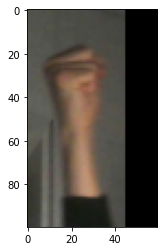

In [106]:
plt.imshow(X[700].astype(np.uint8))
plt.show()

In [107]:
X = np.array(X)

y = tf.keras.utils.to_categorical(np.asarray(y))

print(X.shape)
print(y)

X = X.reshape(-1, sizeX, sizeY, 3)

(934, 100, 60, 3)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

print(y_train)
print(X_train[0][0][:5])

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
[[78. 81. 74.]
 [78. 79. 73.]
 [79. 80. 74.]
 [79. 80. 74.]
 [78. 79. 73.]]


In [109]:
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

#print(X_train, y_train)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 58, 98, 16)        448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 29, 49, 16)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 29, 49, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 27, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 23, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 13, 23, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 21, 64)      

In [112]:
print(X_train.shape)
print(y_train.shape)

(700, 60, 100, 3)
(700, 2)


In [113]:
history = model.fit(X_train, y_train, verbose=2, epochs=100)

Epoch 1/100
22/22 - 1s - loss: 0.6747 - accuracy: 0.6286
Epoch 2/100
22/22 - 1s - loss: 0.6285 - accuracy: 0.6414
Epoch 3/100
22/22 - 1s - loss: 0.6388 - accuracy: 0.6343
Epoch 4/100
22/22 - 1s - loss: 0.6190 - accuracy: 0.6457
Epoch 5/100
22/22 - 1s - loss: 0.6542 - accuracy: 0.6357
Epoch 6/100
22/22 - 1s - loss: 0.6412 - accuracy: 0.6329
Epoch 7/100
22/22 - 1s - loss: 0.5997 - accuracy: 0.6857
Epoch 8/100
22/22 - 1s - loss: 0.6146 - accuracy: 0.6786
Epoch 9/100
22/22 - 1s - loss: 0.6145 - accuracy: 0.6629
Epoch 10/100
22/22 - 1s - loss: 0.5724 - accuracy: 0.7143
Epoch 11/100
22/22 - 1s - loss: 0.5783 - accuracy: 0.6943
Epoch 12/100
22/22 - 1s - loss: 0.5731 - accuracy: 0.7071
Epoch 13/100
22/22 - 1s - loss: 0.5620 - accuracy: 0.7114
Epoch 14/100
22/22 - 1s - loss: 0.5419 - accuracy: 0.7114
Epoch 15/100
22/22 - 1s - loss: 0.5247 - accuracy: 0.7114
Epoch 16/100
22/22 - 1s - loss: 0.5033 - accuracy: 0.7314
Epoch 17/100
22/22 - 1s - loss: 0.5037 - accuracy: 0.7300
Epoch 18/100
22/22 - 1s

In [114]:
# Saves all the models for future reference

version = 1
modelDir = "Model Versions/HandModelV"

while True:
    try:
        f = open(modelDir + str(version) + ".h5", 'r')
        f.close()
        version = version + 1
    except:
        break
    
model.save(modelDir + str(version) + ".h5")

In [124]:
print(X_test[0].shape)

(60, 100, 3)


In [115]:
pred_hot = model.predict(X_test)

pred = np.argmax(pred_hot, axis=1)

y_compare = np.argmax(y_test, axis=1)

score = metrics.accuracy_score(y_compare, pred)

print("Accuracy score: {}".format(score))

#print(pred_hot[:5])
#print(pred)

Accuracy score: 0.9786324786324786


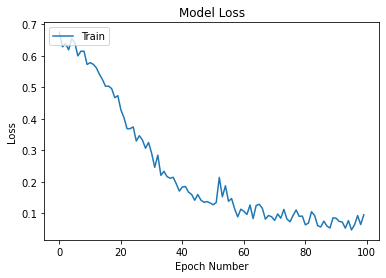

In [116]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['Train'], loc='upper left')
plt.show()

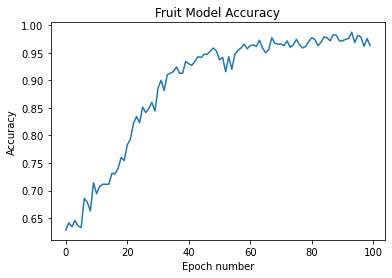

In [117]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Fruit Model Accuracy')
plt.xlabel("Epoch number")
plt.ylabel("Accuracy")
plt.show()

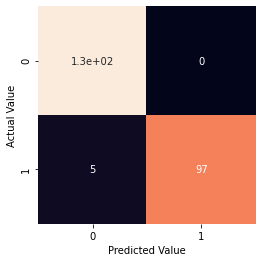

In [118]:
mat = confusion_matrix(pred, y_compare)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()